In [119]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [120]:
df=pd.read_csv('loan.csv')
pd.set_option('display.max_columns', None)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


The following function will show me the top 5 rows in the dataset

In [121]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The following function will show me the last 5 rows in the dataset

In [122]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


### Columns Description

## Dataframe Atributes

### Characterisation of the data set:


Lets now visualize the data types of each column and any missing values

In [123]:
df.info

<bound method DataFrame.info of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
976  LP002971   Male     Yes         3+  Not Graduate           Yes   
977  LP002975   Male     Yes          0      Graduate            No   
978  LP002980   Male      No          0      Graduate            No   
979  LP002986   Male     Yes          0      Graduate            No   
980  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0   

I will now inspect the data types of the columns

In [124]:
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [125]:
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

Checking the shape of the dataframe

The following function, will display the number of rows (981) and the number of columns (13)

In [126]:
print('Shape of DataFrame (Observations and Rows) = ', df.shape)

Shape of DataFrame (Observations and Rows) =  (981, 13)


In [127]:
df.shape

(981, 13)

Now I will see the column names

In [128]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [129]:
values = df.values
values

array([['LP001002', 'Male', 'No', ..., 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002980', 'Male', 'No', ..., nan, 'Semiurban', nan],
       ['LP002986', 'Male', 'Yes', ..., 1.0, 'Rural', nan],
       ['LP002989', 'Male', 'No', ..., 1.0, 'Rural', nan]], dtype=object)

## Number of distinct values in each feature

Lets now visualize the number of distinct values in each feature

In [130]:
for col in df.columns:
    print(col, ': Number of Distinct Values: ', len(df[col].unique()))

Loan_ID : Number of Distinct Values:  981
Gender : Number of Distinct Values:  3
Married : Number of Distinct Values:  3
Dependents : Number of Distinct Values:  5
Education : Number of Distinct Values:  2
Self_Employed : Number of Distinct Values:  3
ApplicantIncome : Number of Distinct Values:  752
CoapplicantIncome : Number of Distinct Values:  437
LoanAmount : Number of Distinct Values:  233
Loan_Amount_Term : Number of Distinct Values:  13
Credit_History : Number of Distinct Values:  3
Property_Area : Number of Distinct Values:  3
Loan_Status : Number of Distinct Values:  3


### Print the distinct values in each feature

In [131]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  Loan_ID :
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP0

I will now look for duplicate rows

In [132]:
df.count()

Loan_ID              981
Gender               957
Married              978
Dependents           956
Education            981
Self_Employed        926
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
Loan_Status          614
dtype: int64

In [133]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


In [134]:
df.duplicated().sum()

0

There is no duplicate data

The following function will give me a summary of statistics pertaining to the float columns and calculate the 5 number summary giving me the Mean, Standard Deviation, 1st Quartile: 25%, 3rd Quartile: 75%, Minimum: Smallest Observation in the Sample and Maximum: Largest Observation in the sample.

In [135]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [136]:
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


I will now call the .describe() function to quickly analyse the summary statistics for the numerical features.¶

In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


In [138]:
print('length of data is', len(df))

length of data is 981


I will visualize how many Qualitative features are there in the dataset

In [139]:
qualitative=[feature for feature in df.columns if len(df[feature].unique())<=10]
qualitative

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

The following code tells me the amount of quantitative variables in the dataframe.

In [140]:
quantitative=[feature for feature in df.columns if df[feature].dtype!='O' and
             len(df[feature].unique())>10]
quantitative

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

I will now use Histogram to visualize the distribution of quantitative features by using the function count in the quantitative columns

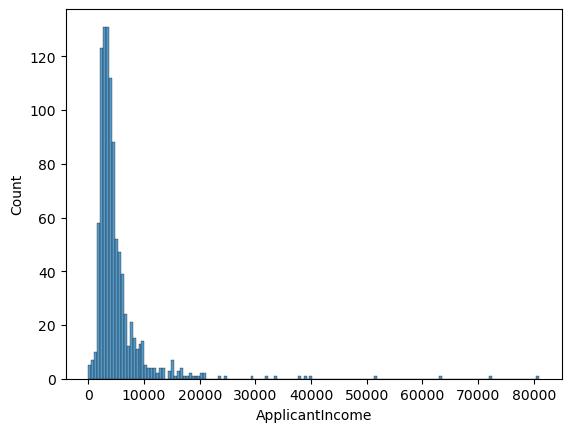

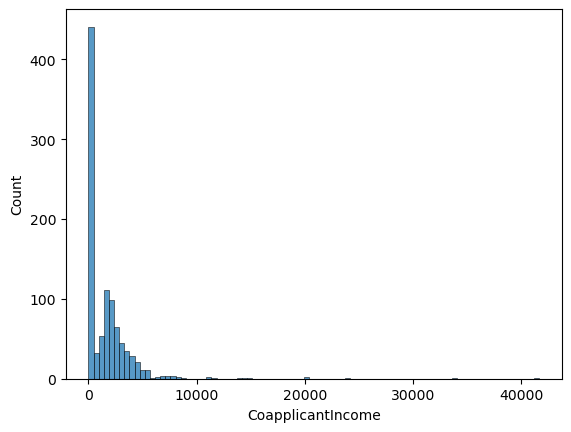

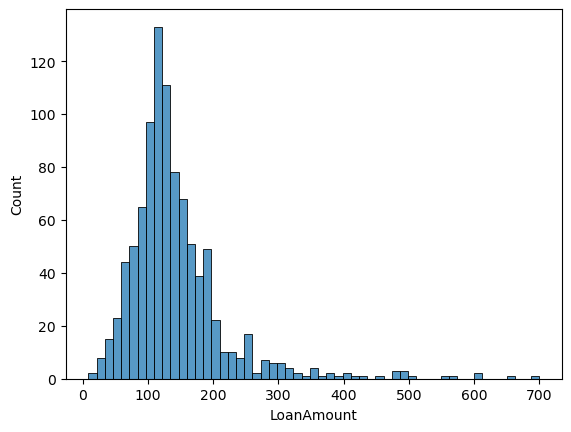

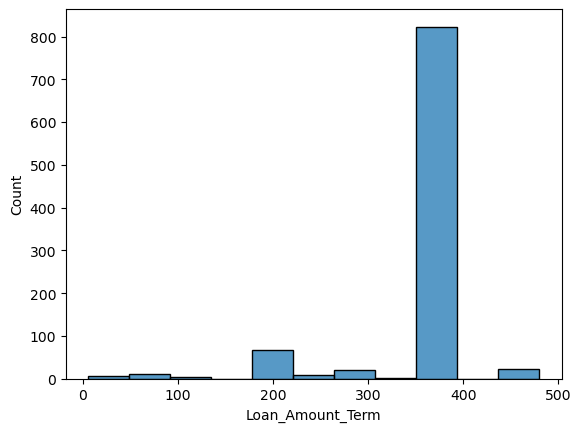

In [141]:
for feature in quantitative:
    sns.histplot(df[feature])
    plt.show()

Lets analyse the Descriptive Statistics for Numerical columns

In [142]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
print("Descriptive Statistics for Numerical Columns:")
print(df[numerical_cols].describe())

Descriptive Statistics for Numerical Columns:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


I will define categorica cols as Categorical Columns and will continue to visualize its values

In [143]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
print("\nValues for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Mode: {df[col].mode().tolist()}")


Values for Categorical Columns:

Gender:
Male      775
Female    182
Name: Gender, dtype: int64
Number of Unique Values: 2
Mode: ['Male']

Married:
Yes    631
No     347
Name: Married, dtype: int64
Number of Unique Values: 2
Mode: ['Yes']

Dependents:
0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64
Number of Unique Values: 4
Mode: ['0']

Education:
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
Number of Unique Values: 2
Mode: ['Graduate']

Self_Employed:
No     807
Yes    119
Name: Self_Employed, dtype: int64
Number of Unique Values: 2
Mode: ['No']

Property_Area:
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
Number of Unique Values: 3
Mode: ['Semiurban']

Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64
Number of Unique Values: 2
Mode: ['Y']


Check the different values in each feature.

To better understand each feature, I will now use df[col].unique in order to visualize every unique value in each column

In [144]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  Loan_ID :
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP0

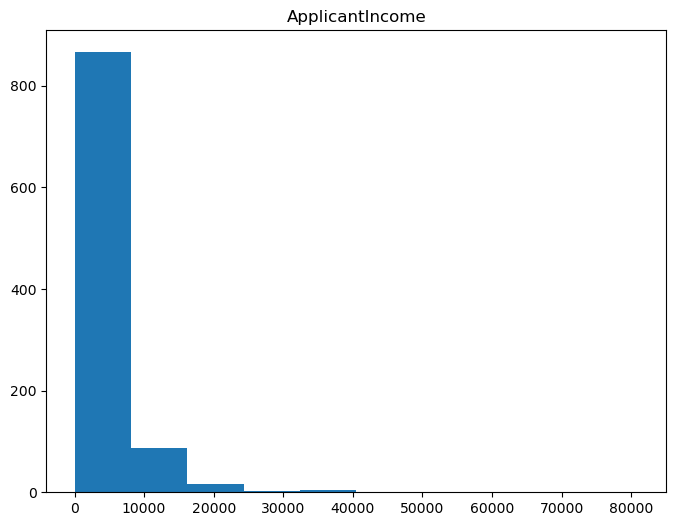

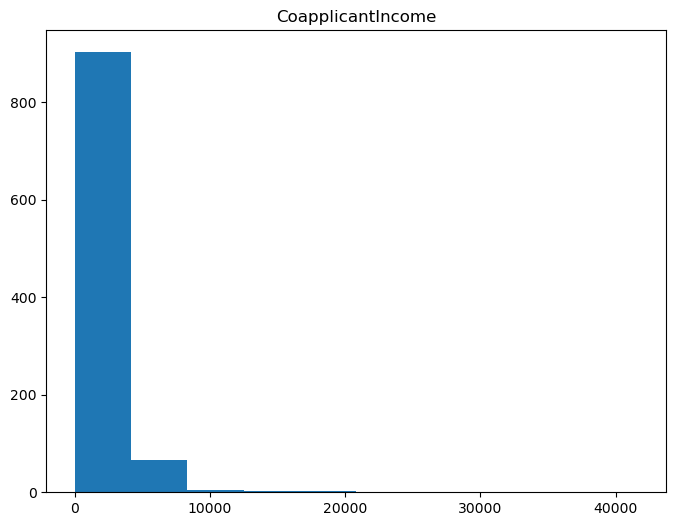

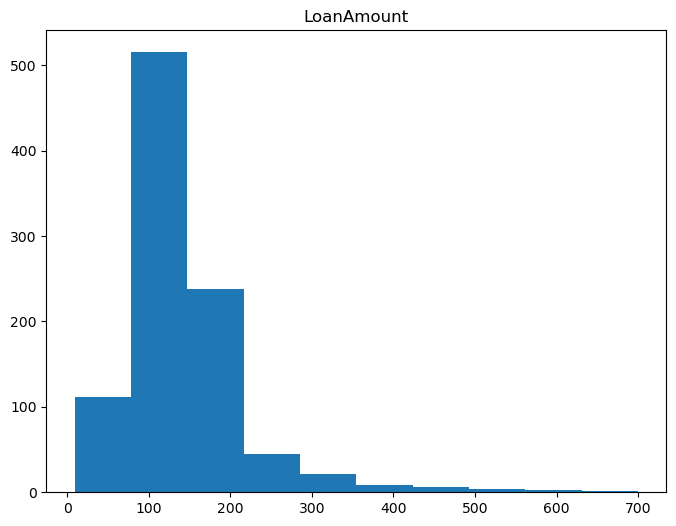

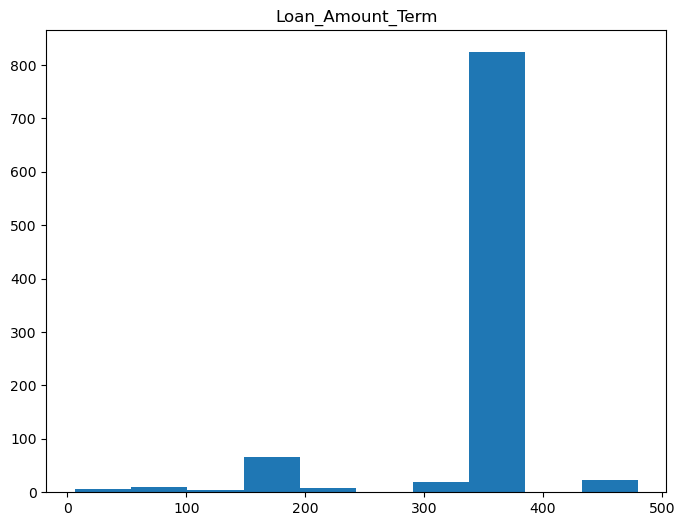

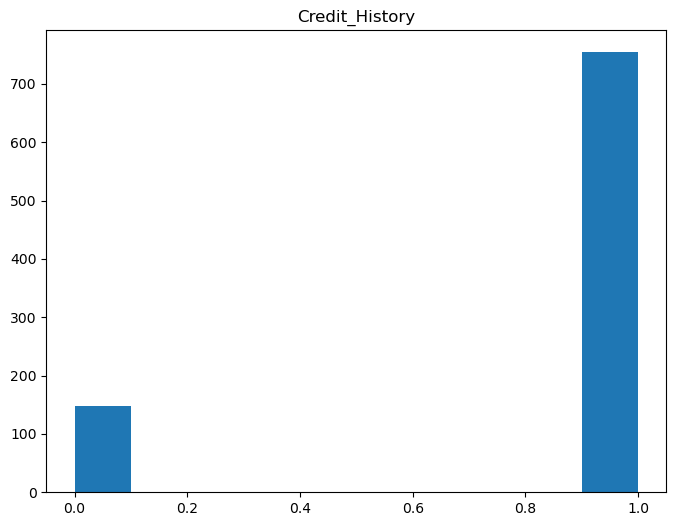

In [145]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10)
    plt.title(col)
    plt.show()

## Data Cleaning

I will now clean the new dataset to improve data consistency by standardizing and harmonizing the data making it consistent and comparable. Overall I want my data to be reliable and consistent which in turn will lead to a more robust and trustworthy insights and conclusions. I will follow this steps:

Locate any missing values

check for duplicated items

Number of missing data points per column

NaN values will be marked as True

In [146]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,False,False,False,False,False,False,False,False,False,False,False,False,True
977,False,False,False,False,False,False,False,False,False,False,False,False,True
978,False,False,False,False,False,False,False,False,False,False,True,False,True
979,False,False,False,False,False,False,False,False,False,False,False,False,True


How many missing values are there in the dataset?

In [147]:
missing_values_count = df.isnull().sum()
missing_values_count[:]

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [148]:
df.isnull().mean()*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [149]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [150]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

In [151]:
total_missing

600

In [152]:
percentage_missing = (round(df.isnull().  sum() * 100/ len(df),2).sort_values(ascending=False))
display(pd.DataFrame({'Missing Percentage' :percentage_missing}));

,Missing Percentage
Loan_Status,37.41
Credit_History,8.05
Self_Employed,5.61
LoanAmount,2.75
Dependents,2.55
Gender,2.45
Loan_Amount_Term,2.04
Married,0.31
Loan_ID,0.00
Education,0.00


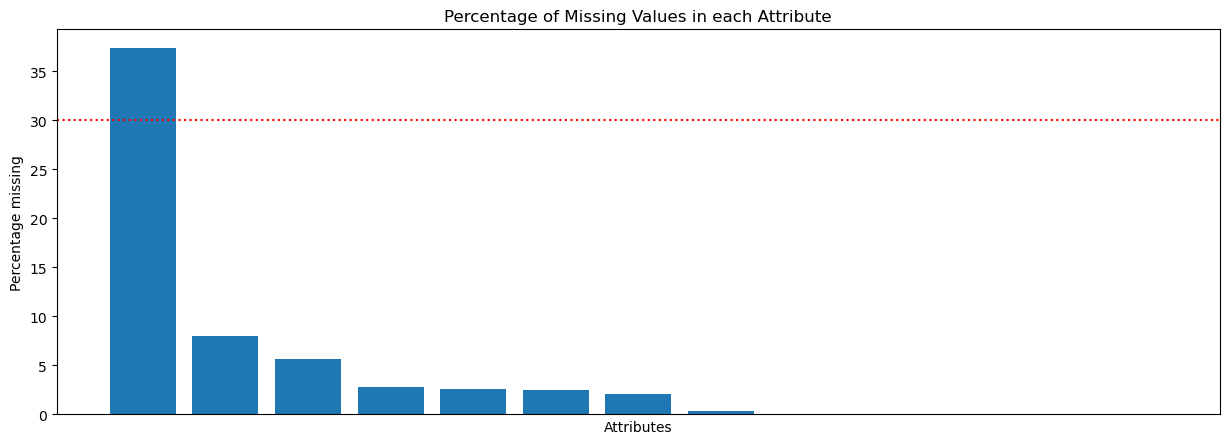

In [153]:
fig, ax = plt.subplots(figsize=(15,5))
threshold = 30

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending = False )

ax.bar(missing.index, missing.values.T[0])
plt.title("Percentage of Missing Values in each Attribute")
plt.xticks([])
plt.xlabel("Attributes")
plt.ylabel("Percentage missing")
plt.axhline(threshold, color='red', ls='dotted')
plt.show()

In [154]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [155]:
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

I will now replace missing values in quantitative data with the mean

In [196]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [197]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

I will now remove the remaining null values in Qualitative data

In [198]:
df.dropna(inplace=True)  
df.isnull().sum()   

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [199]:
df.shape

(554, 13)

We dropped 427 records

### Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot.

<Axes: xlabel='ApplicantIncome'>

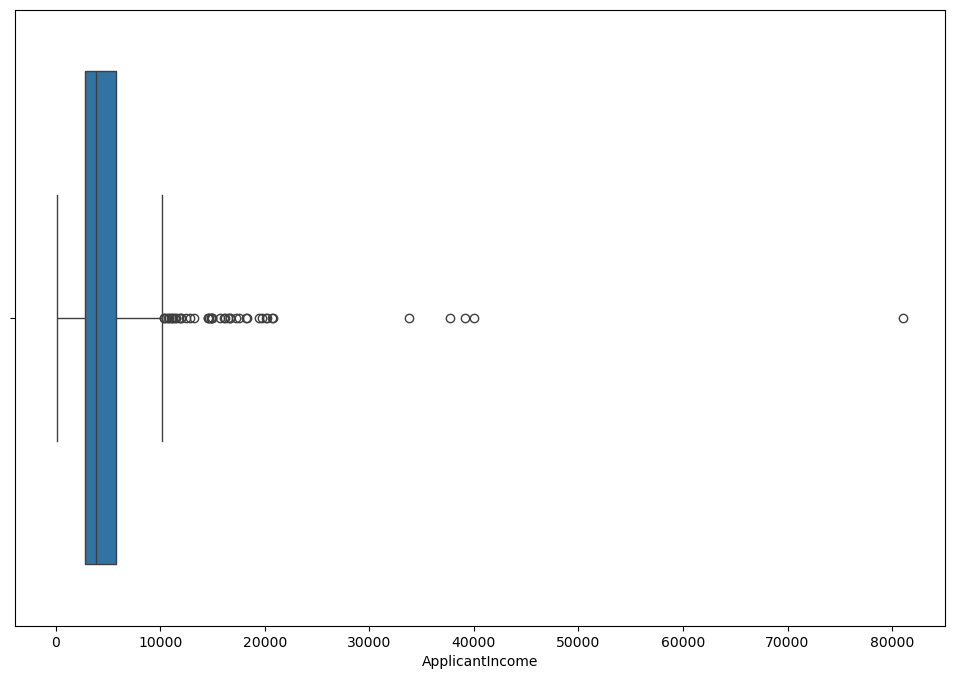

In [200]:
sns.boxplot(x=df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

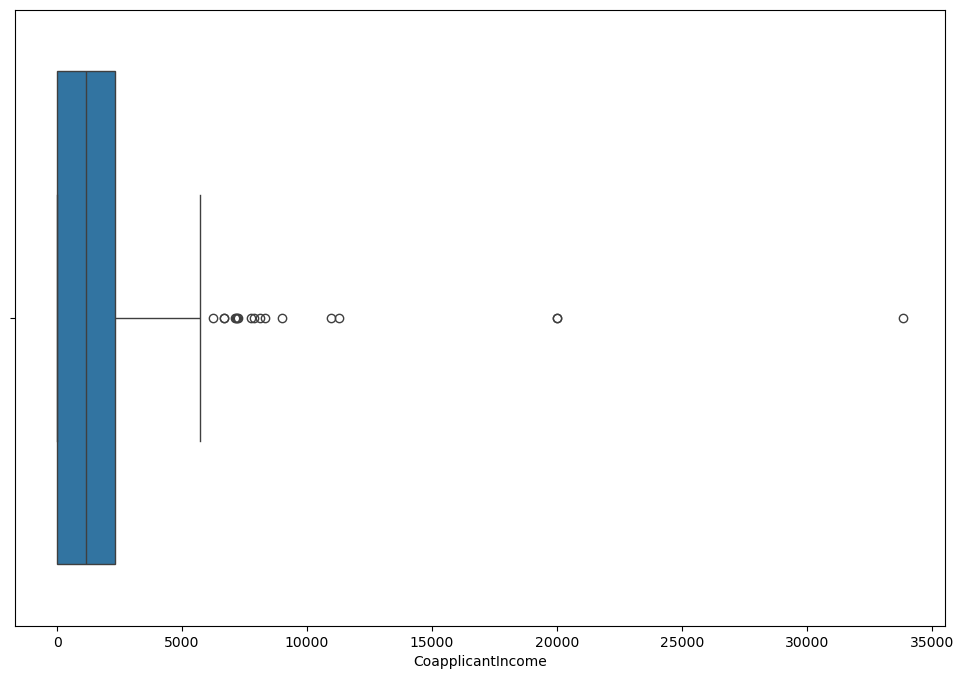

In [201]:
sns.boxplot(x=df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

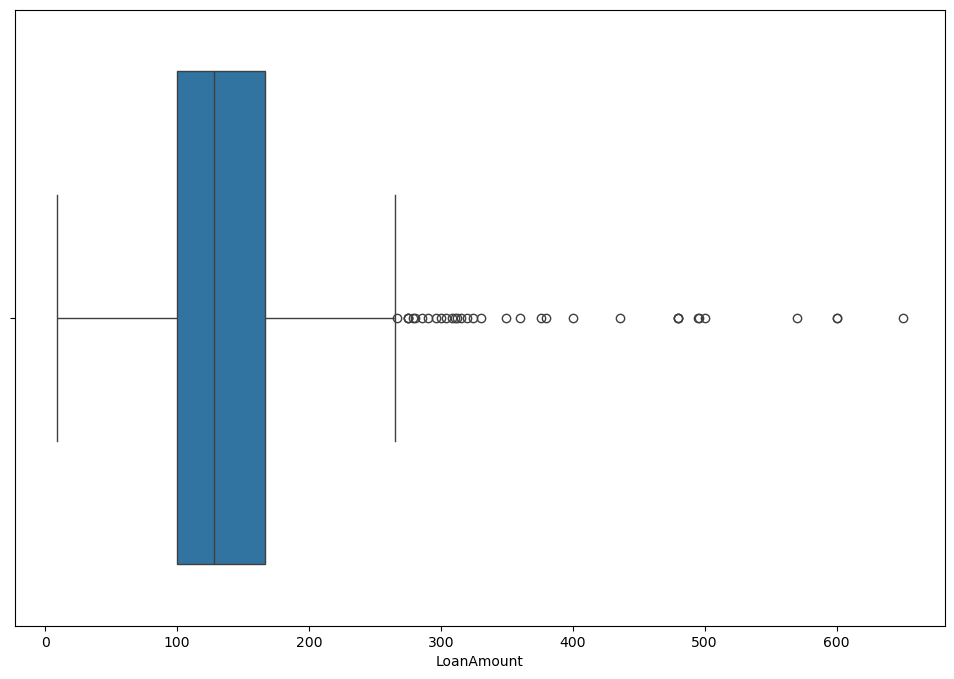

In [202]:
sns.boxplot(x=df['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term'>

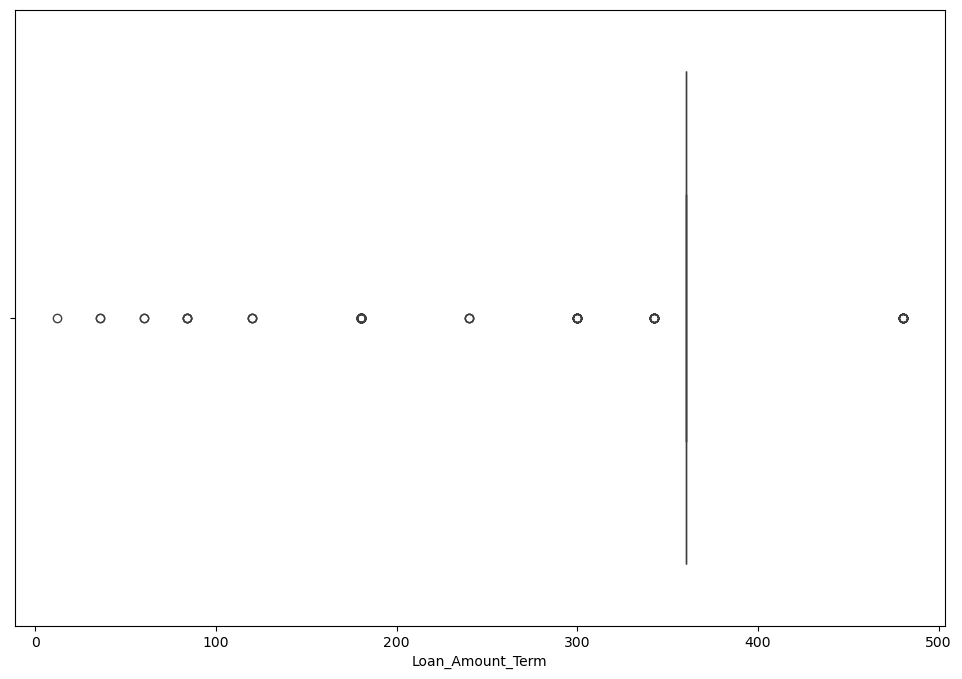

In [203]:
sns.boxplot(x=df['Loan_Amount_Term'])

### Histograms for numerical columns

The following Histograms visualize the distribution of numerical columns (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History).

kde=True adds a kernel density estimation line.

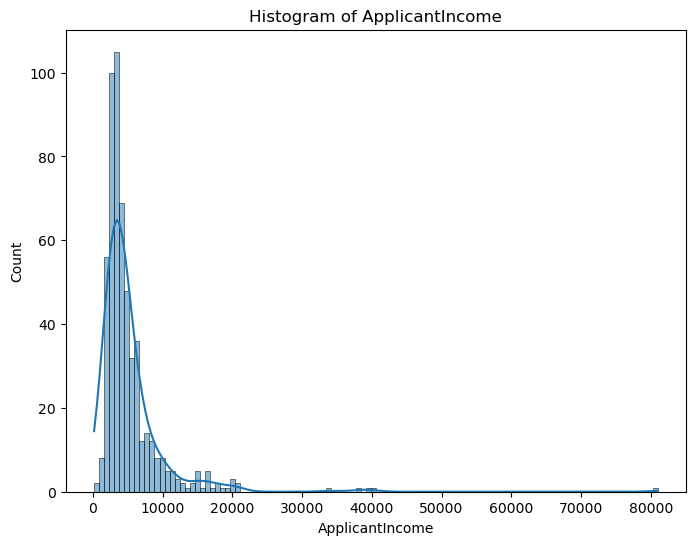

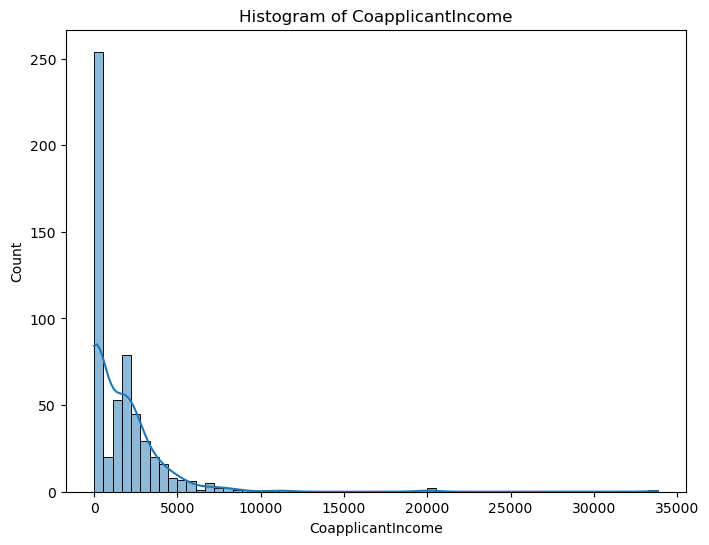

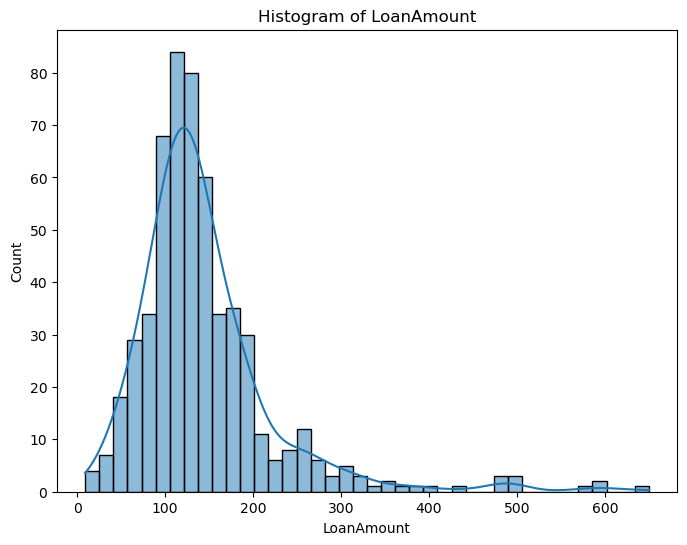

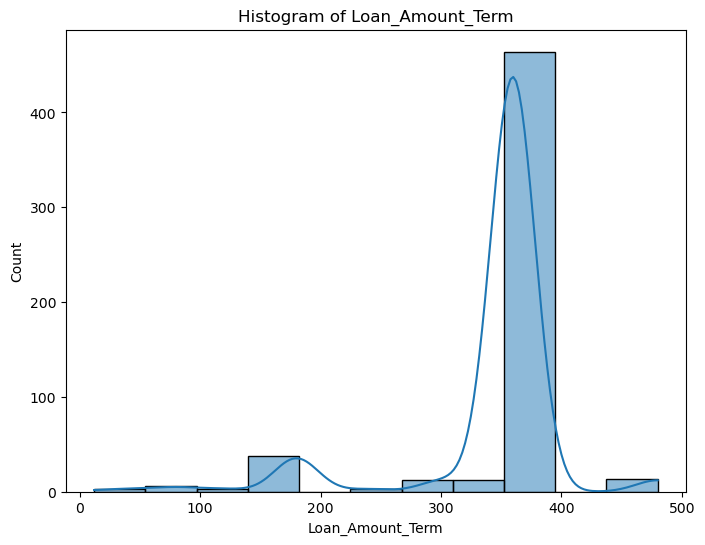

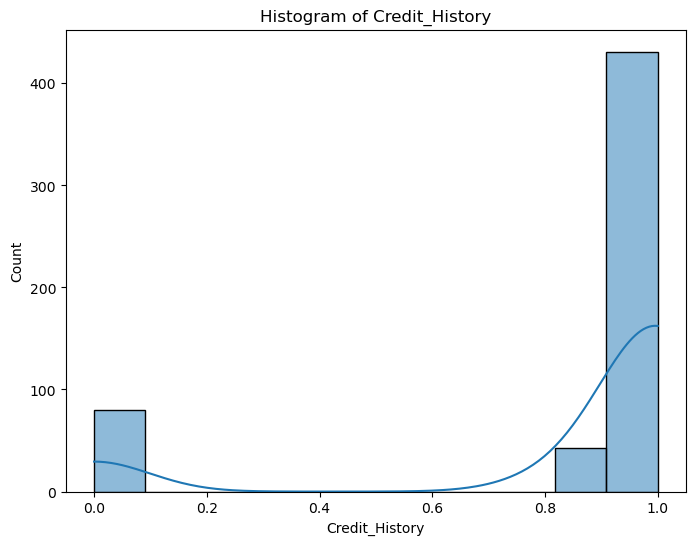

In [204]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), kde=True)  
    plt.title(f'Histogram of {col}')
    plt.show()

### Box plots for numerical columns

The following Box plots show the distribution of numerical columns, including quartiles and potential outliers.

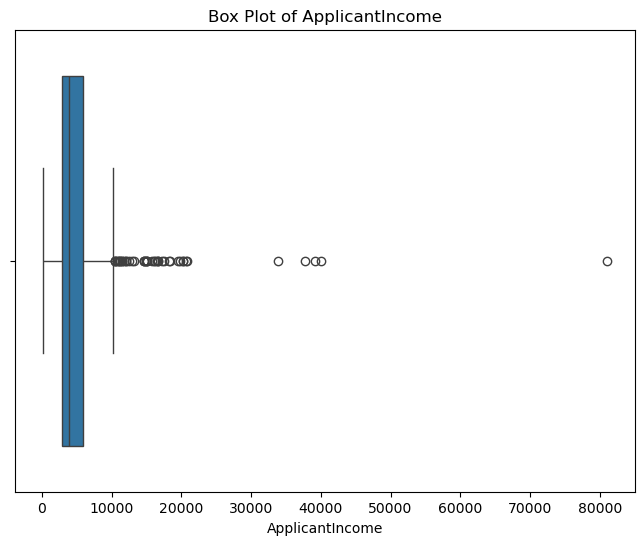

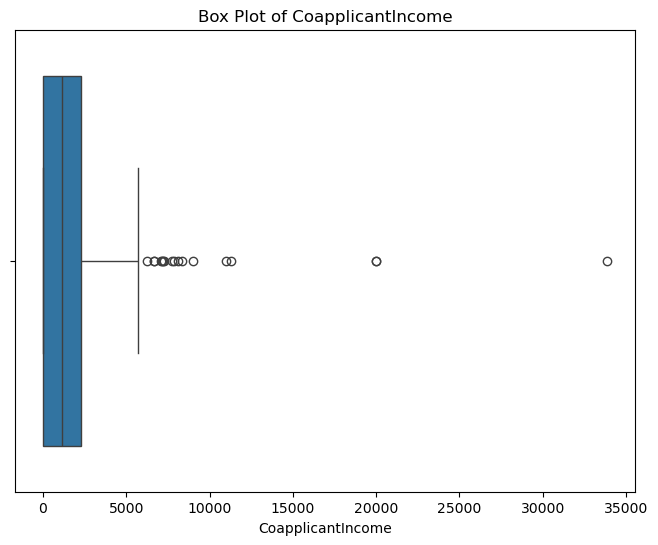

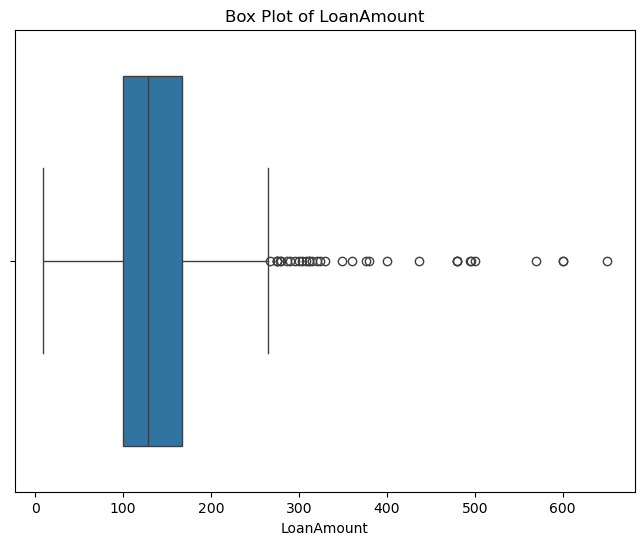

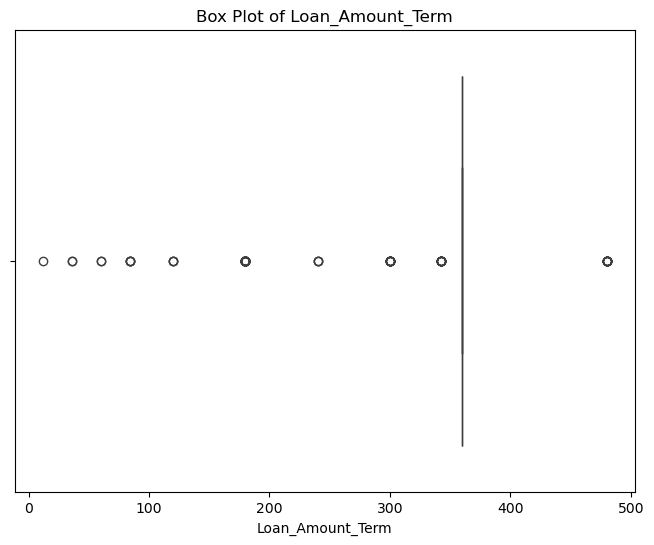

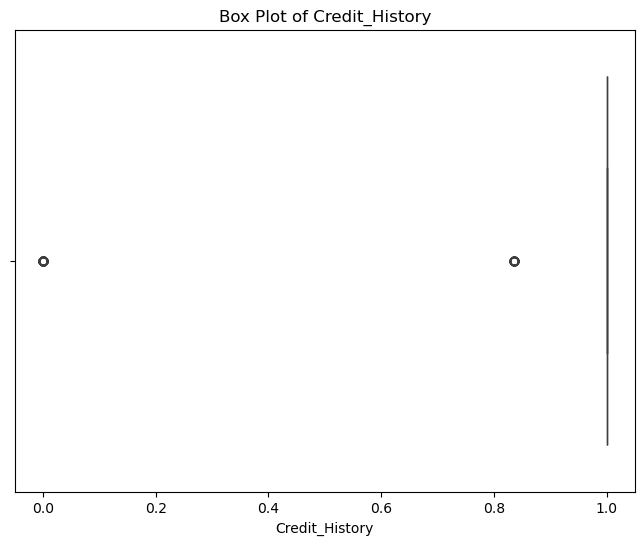

In [205]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.show()

## Visualizations

### Count plots for categorical columns

The Count plots will be used to visualize the frequency of each category in categorical columns (Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status).

This code was used for better readability: plt.xticks(rotation=45, ha='right')

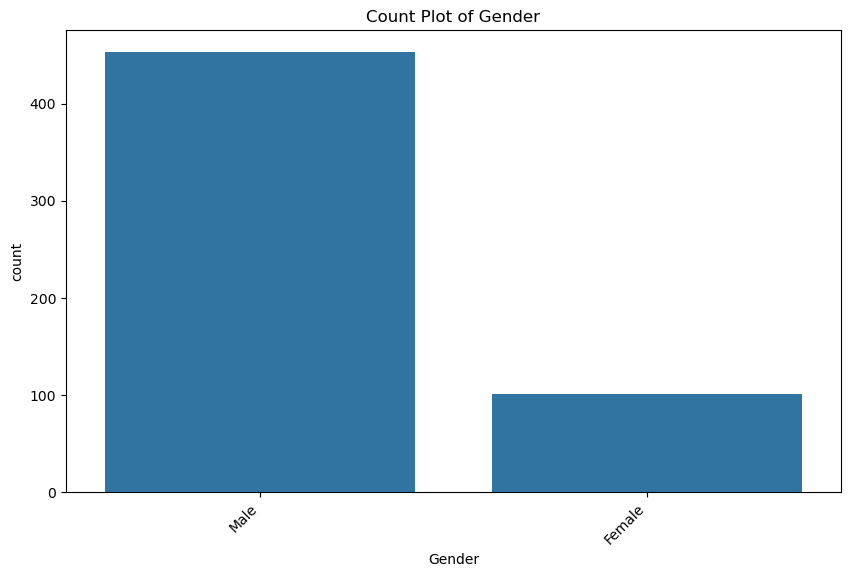

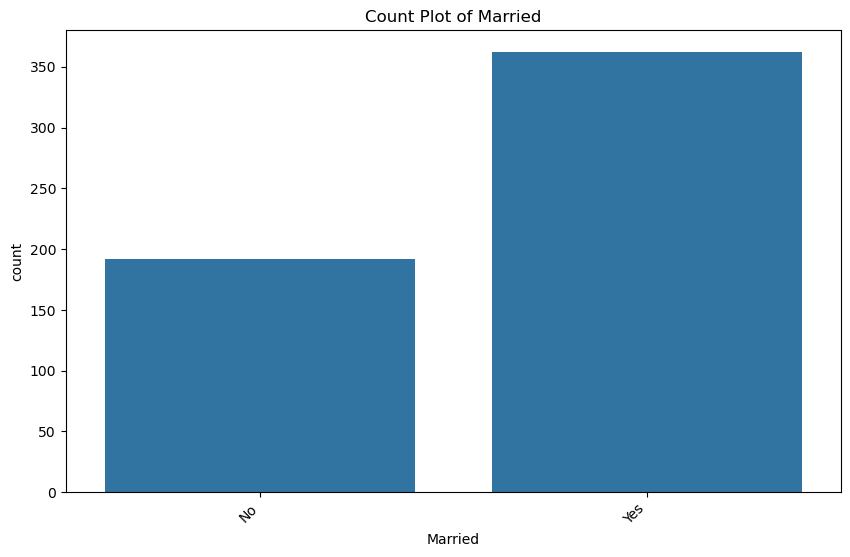

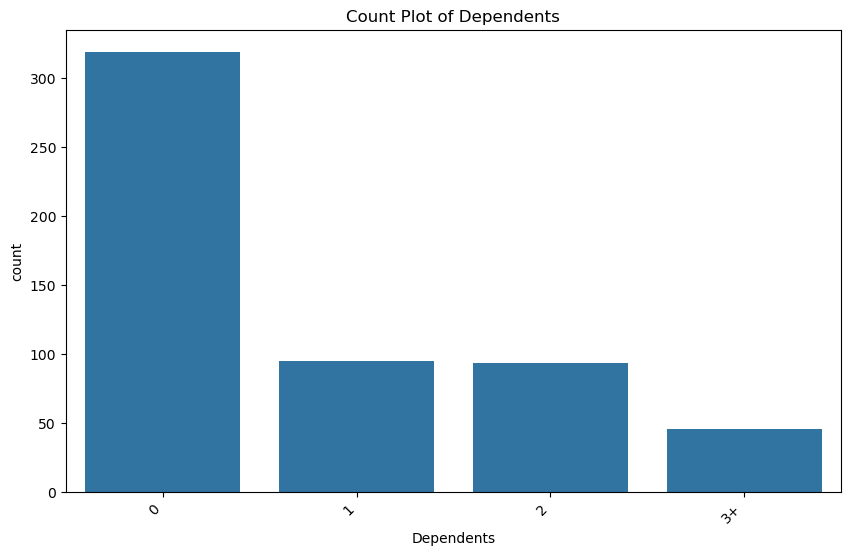

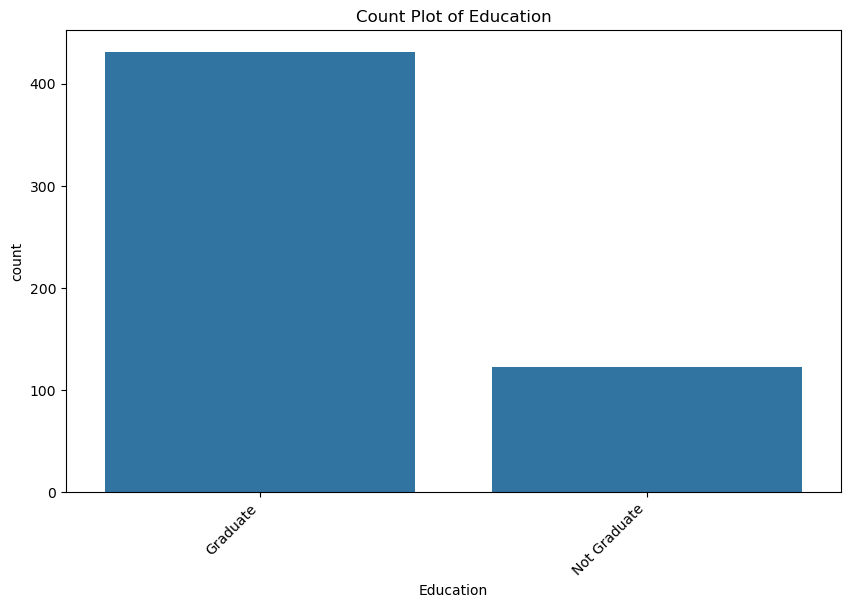

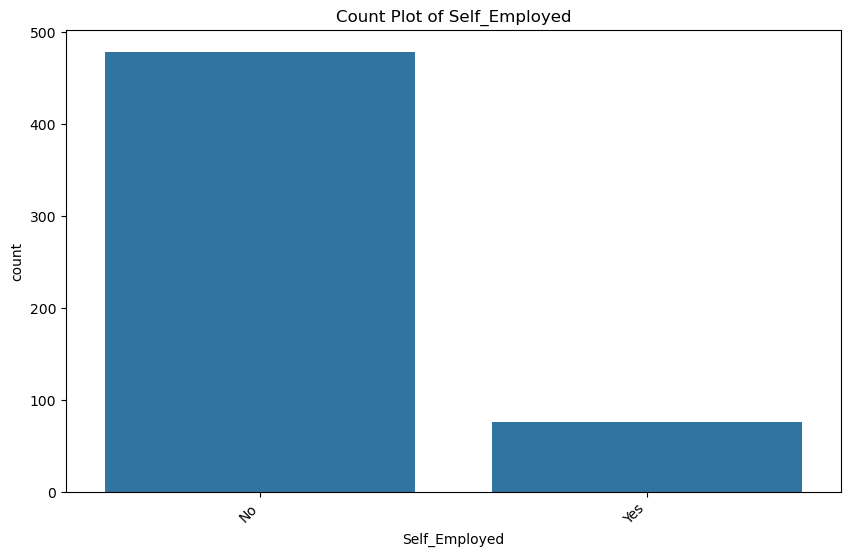

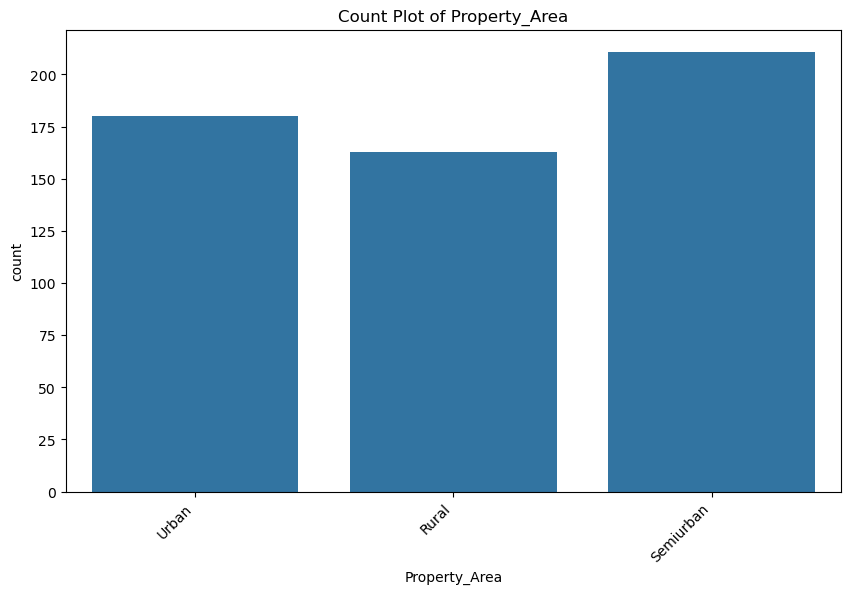

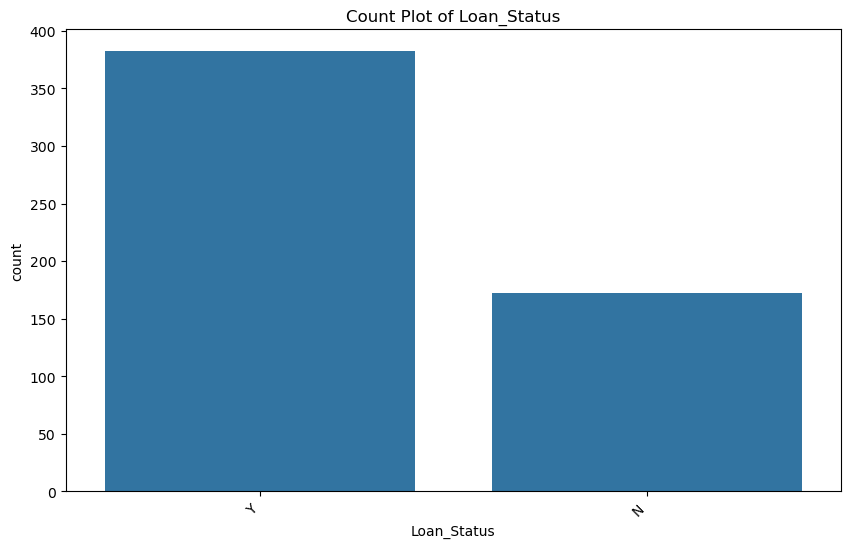

In [206]:
categorical_cols = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

### Pie Chart
The following code will generate pie charts for each of the categorical columns in the dataset, providing a clear visual representation of the distribution of different categories within each column.

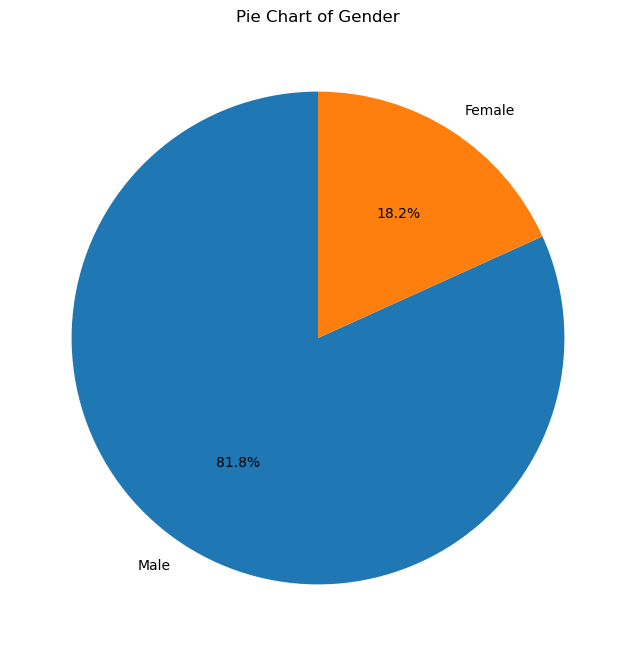

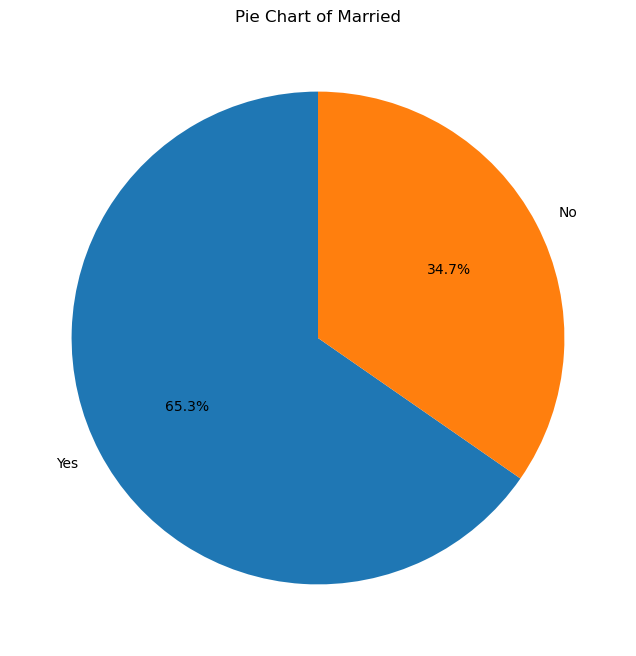

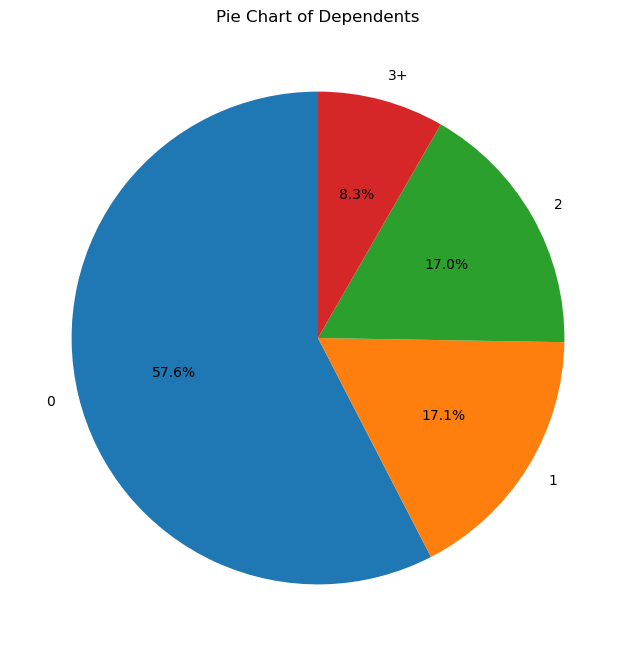

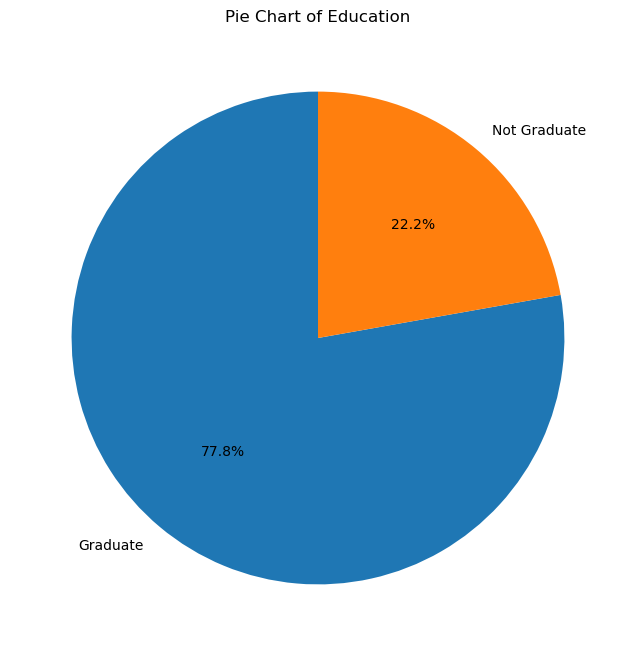

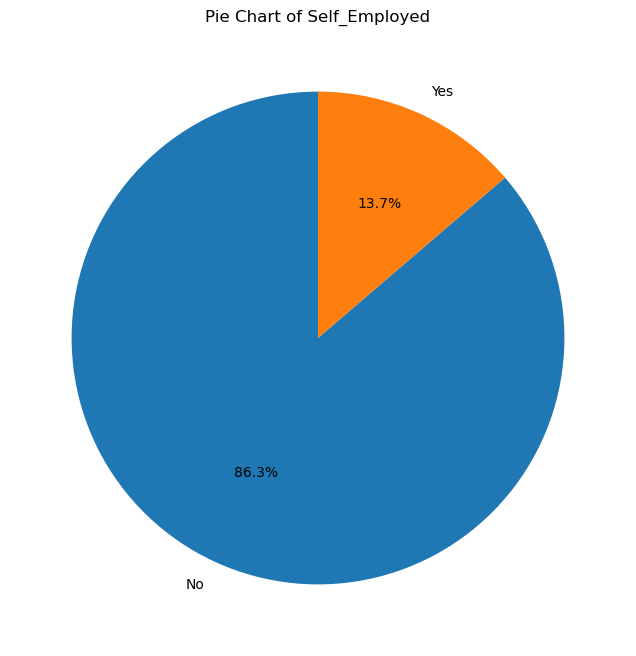

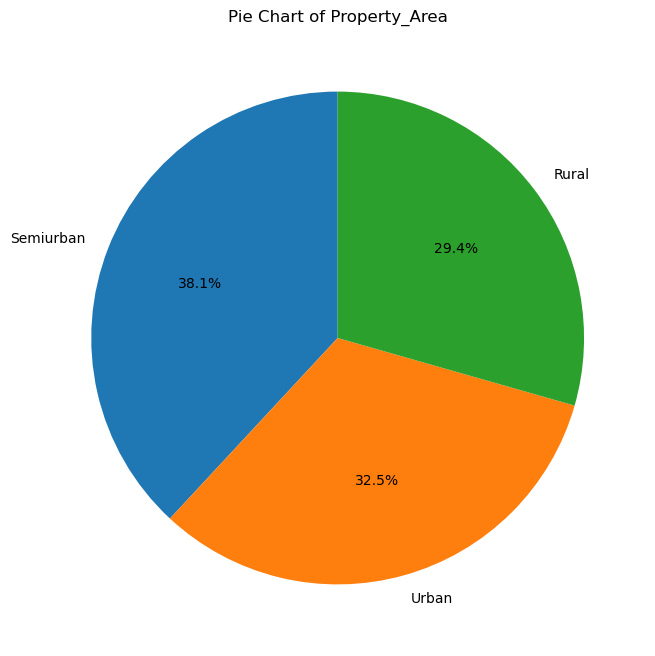

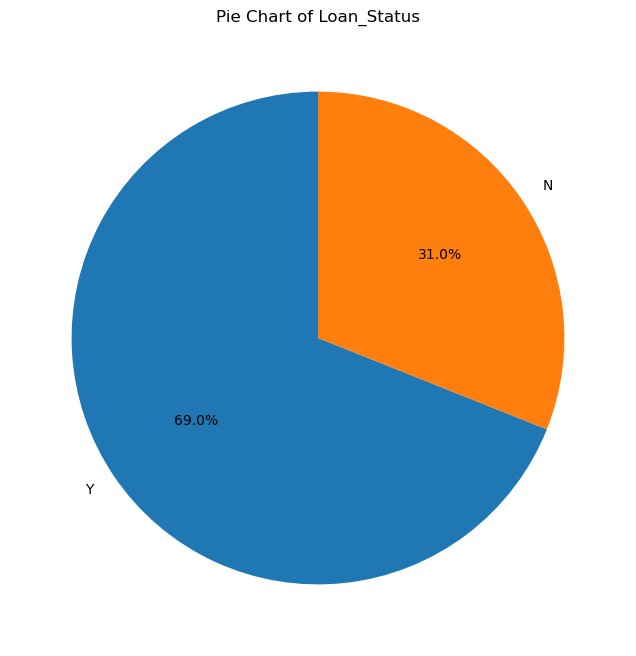

In [207]:
for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  
    plt.show()

### Distribution

We will use multiple count plots and value counts to show the categorical statuses.

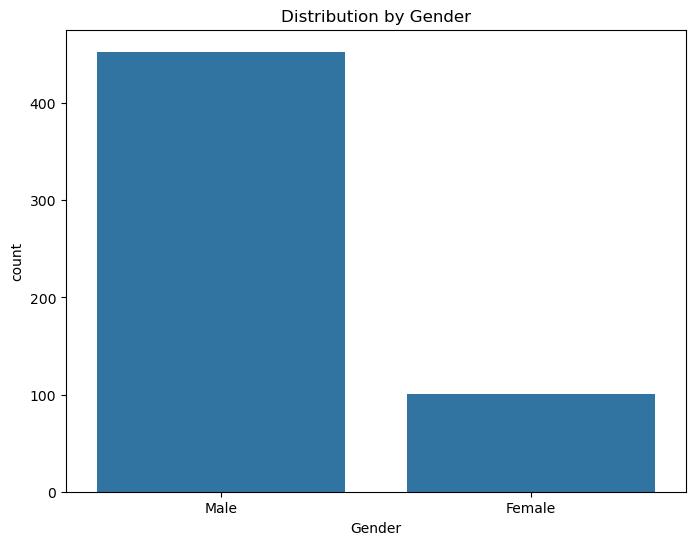

Male      453
Female    101
Name: Gender, dtype: int64


In [208]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution by Gender')
plt.show()
print(df['Gender'].value_counts())

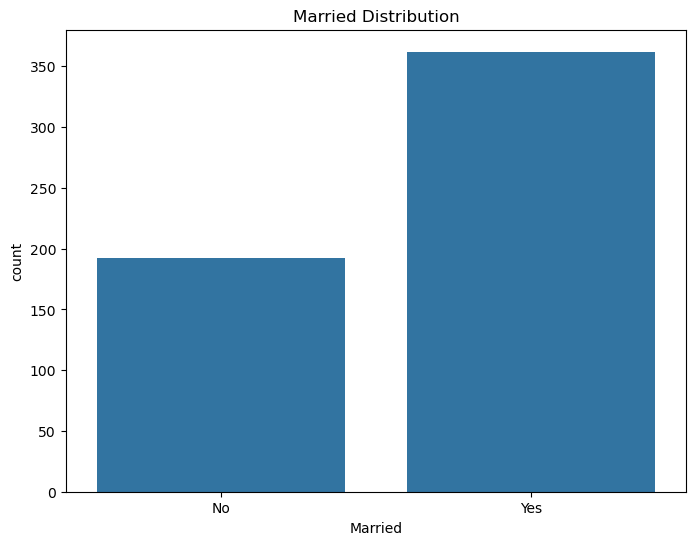

Yes    362
No     192
Name: Married, dtype: int64


In [209]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', data=df)
plt.title('Married Distribution')
plt.show()
print(df['Married'].value_counts())

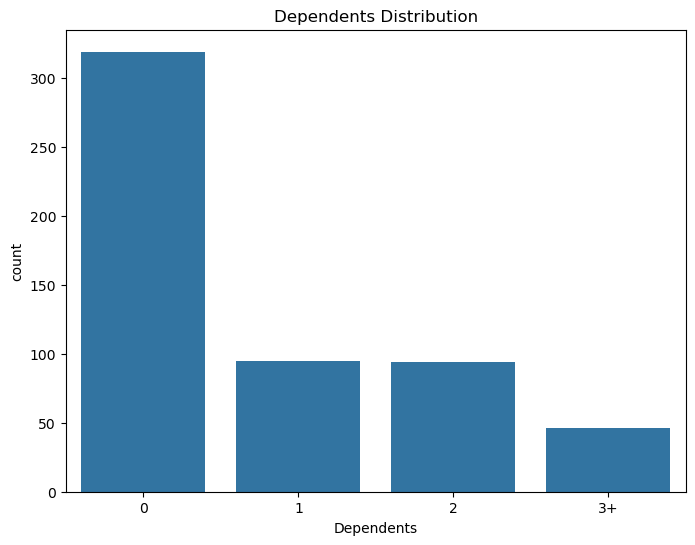

0     319
1      95
2      94
3+     46
Name: Dependents, dtype: int64


In [210]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data=df)
plt.title('Dependents Distribution')
plt.show()
print(df['Dependents'].value_counts())

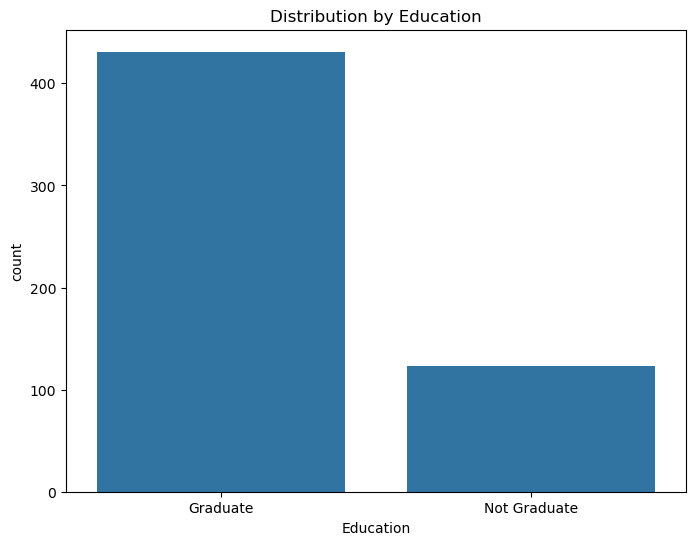

Graduate        431
Not Graduate    123
Name: Education, dtype: int64


In [211]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df)
plt.title('Distribution by Education')
plt.show()
print(df['Education'].value_counts())

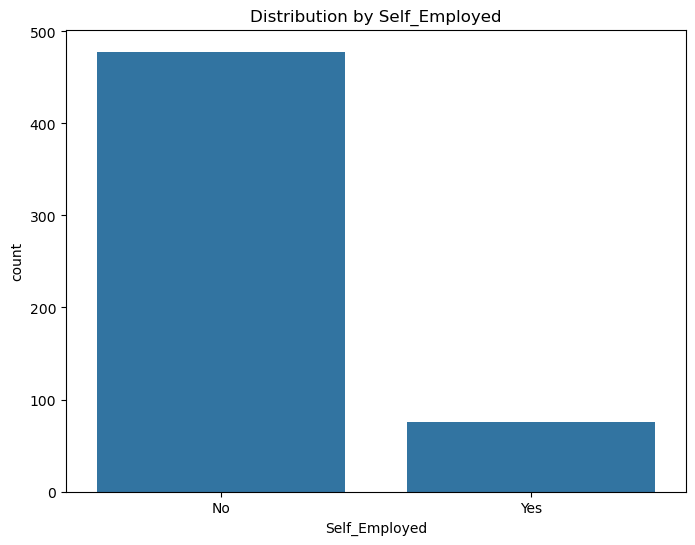

No     478
Yes     76
Name: Self_Employed, dtype: int64


In [212]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', data=df)
plt.title('Distribution by Self_Employed')
plt.show()
print(df['Self_Employed'].value_counts())

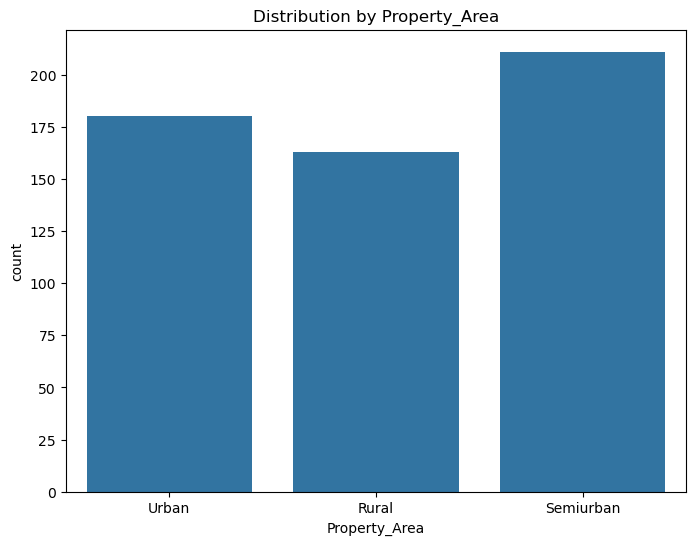

Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64


In [213]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', data=df)
plt.title('Distribution by Property_Area')
plt.show()
print(df['Property_Area'].value_counts())

### Correlation Heatmap

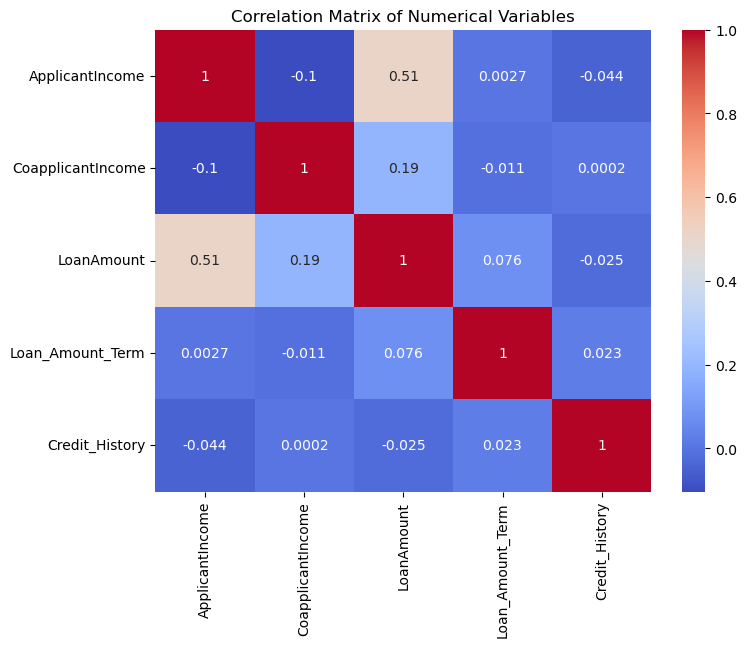

In [214]:
numerical_cols = ['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

<Axes: >

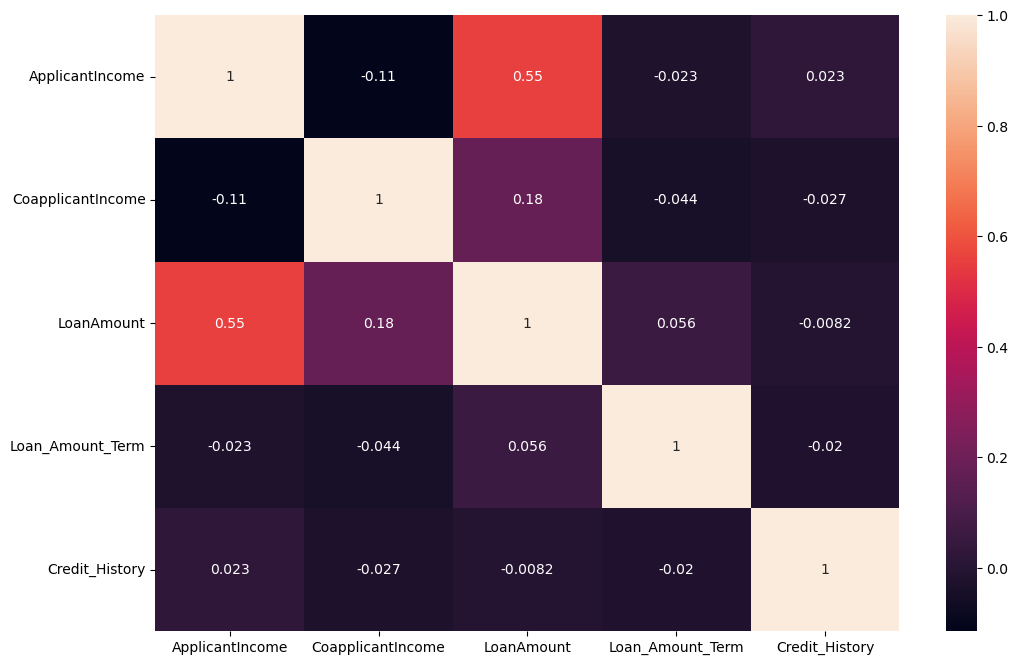

In [215]:
sns.heatmap(corr_mat, annot=True)

In [216]:
corr_mat = df.corr()

In [217]:
corr_mat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.103279,0.510931,0.002656,-0.043859
CoapplicantIncome,-0.103279,1.000000,0.193697,-0.010913,0.000195
LoanAmount,0.510931,0.193697,1.000000,0.075516,-0.025214
Loan_Amount_Term,0.002656,-0.010913,0.075516,1.000000,0.023059
Credit_History,-0.043859,0.000195,-0.025214,0.023059,1.000000


### Scatter Plot

The following scatter plot shows the relationship between LoanAmount and ApplicantIncome.

Scatter Plot: Relationship between ApplicantIncome & LoanAmount')

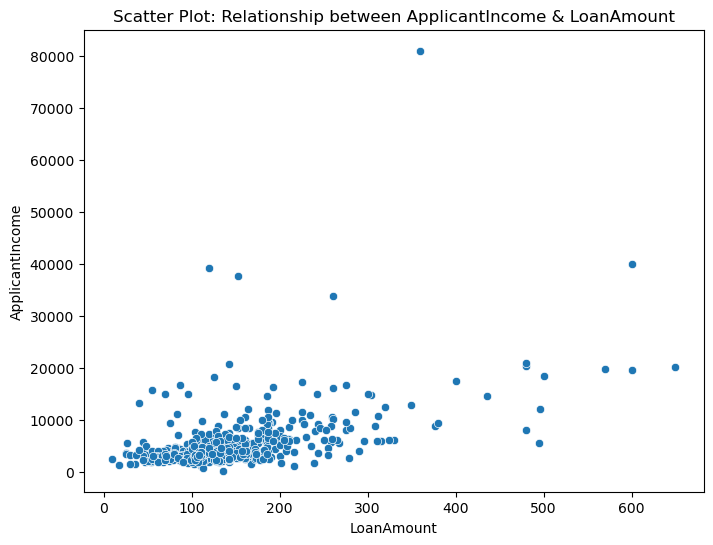

In [218]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=df)
plt.title('Scatter Plot: Relationship between ApplicantIncome & LoanAmount')
plt.show()

<Axes: xlabel='LoanAmount'>

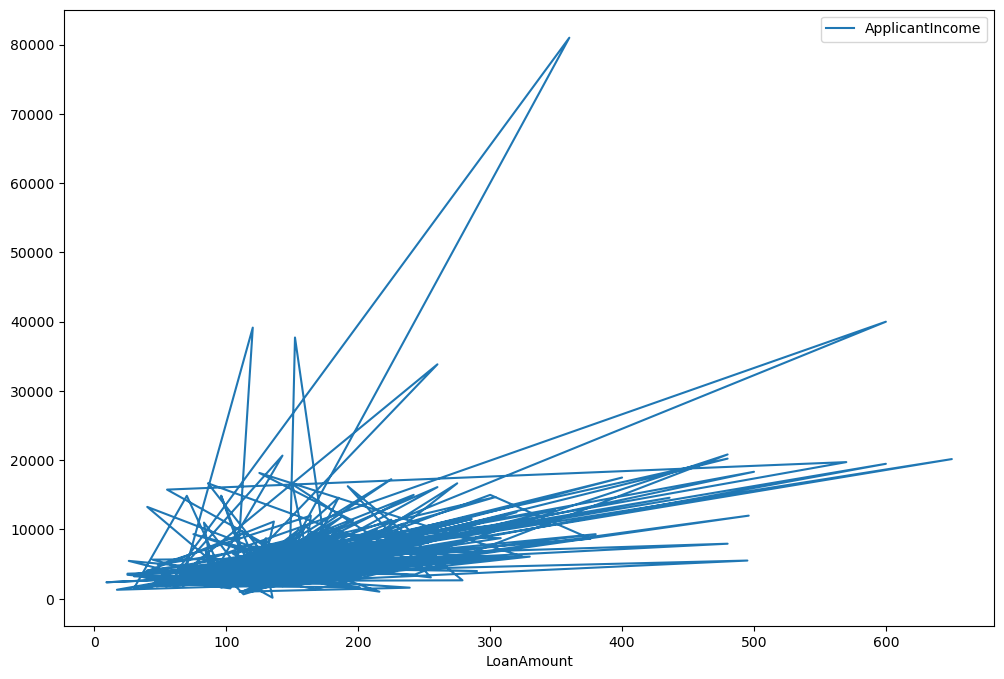

In [219]:
df.plot(x="LoanAmount",y="ApplicantIncome")

Scatter Plot: Relationship between CoapplicantIncome & LoanAmount')

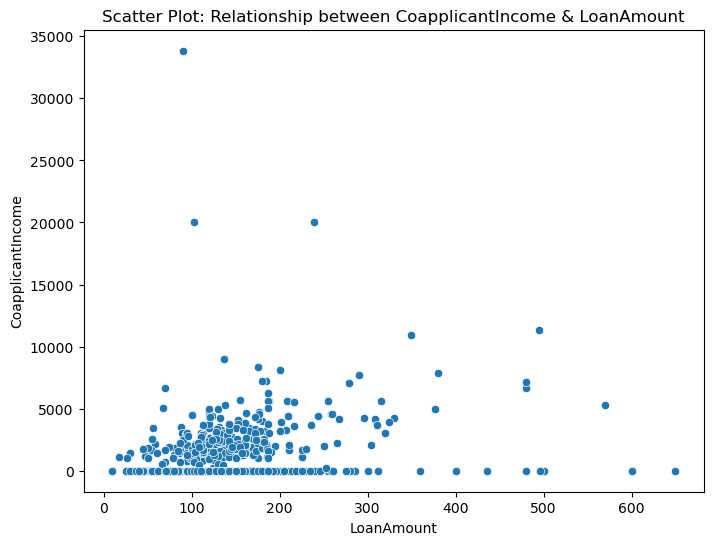

In [220]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LoanAmount', y='CoapplicantIncome', data=df)
plt.title('Scatter Plot: Relationship between CoapplicantIncome & LoanAmount')
plt.show()

<Axes: xlabel='LoanAmount'>

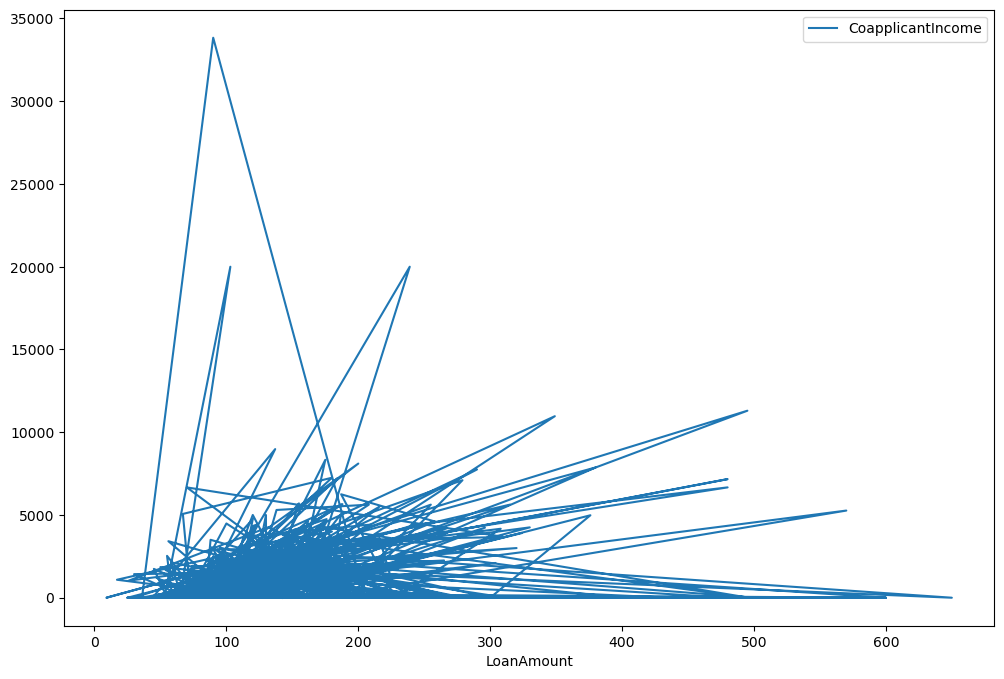

In [221]:
df.plot(x="LoanAmount",y="CoapplicantIncome")

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

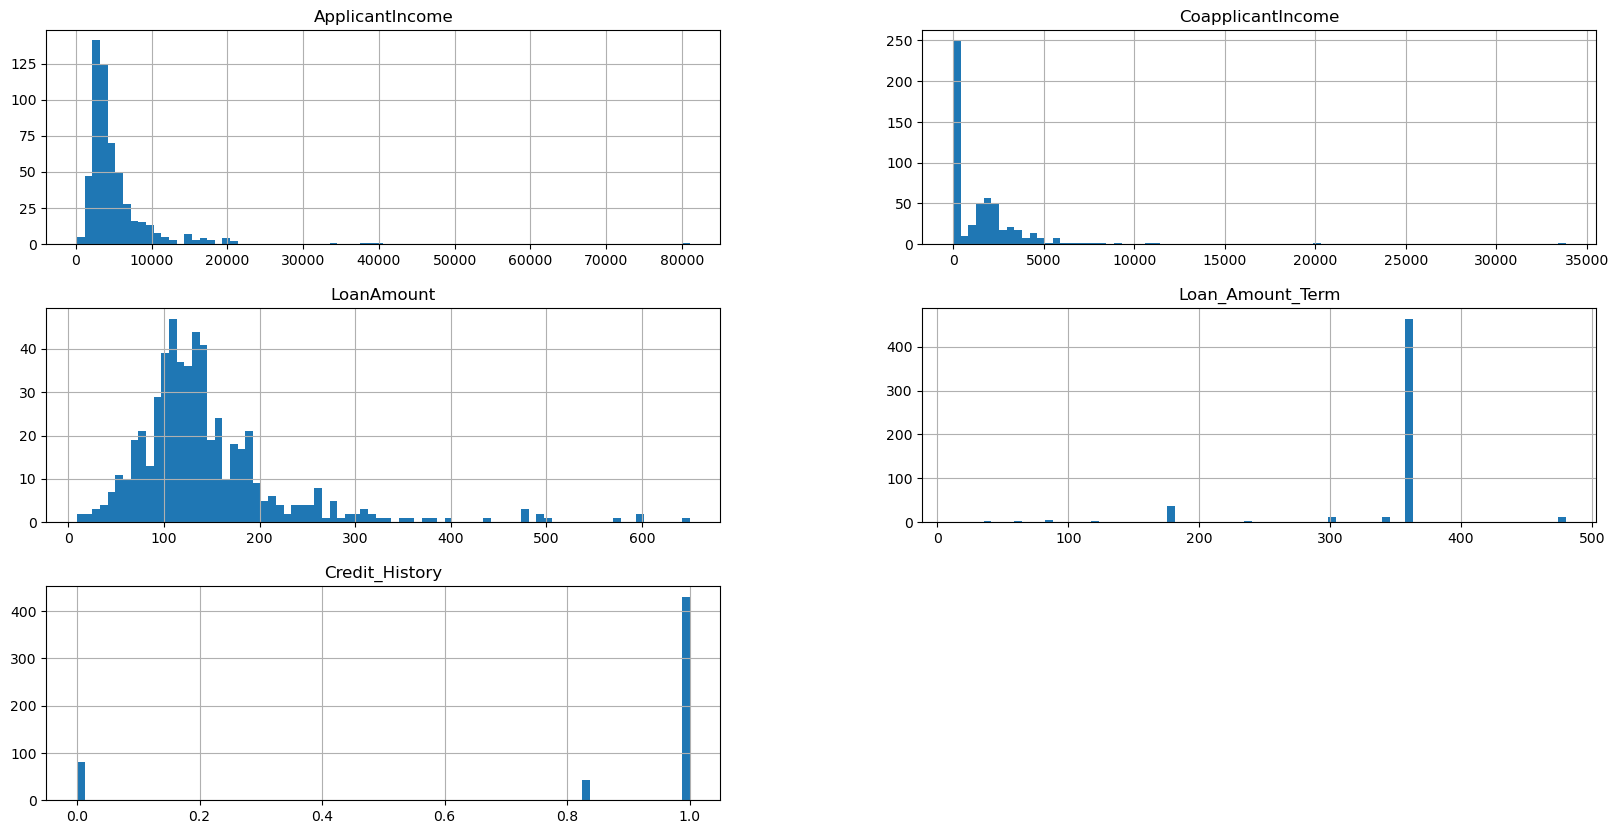

In [222]:
df.hist(bins=80, figsize=(20,10))

In [223]:
groups = df.groupby('LoanAmount')

for key, item in groups:
    print(groups.get_group(key), "\n\n")

      Loan_ID  Gender Married Dependents Education Self_Employed  \
568  LP002840  Female      No          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
568             2378                0.0         9.0             360.0   

     Credit_History Property_Area Loan_Status  
568             1.0         Urban           N   


     Loan_ID Gender Married Dependents Education Self_Employed  \
14  LP001030   Male     Yes          2  Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
14             1299             1086.0        17.0             120.0   

    Credit_History Property_Area Loan_Status  
14             1.0         Urban           Y   


      Loan_ID Gender Married Dependents     Education Self_Employed  \
94   LP001325   Male      No          0  Not Graduate            No   
133  LP001482   Male     Yes          0      Graduate           Yes   

     ApplicantIncome  Coappl

For Categorical categoriesfeatures, I will use one hot encoding.
One hot encoding will convert the categorical variables into numerical by creating a new column with a 1 or a 0.

A 1 will mean the presence of that category, a 0 will indicate a missing value.


Categorical: Treat NaN as a category

In [49]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df[categorical_cols] = df[categorical_cols].fillna('Missing')


Numerical: Simple imputation (mean)

In [52]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


One-Hot Encoding will handle_unknown='ignore' and deal with unseen categories.

In [53]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
encoded_cols = encoder.fit_transform(df[categorical_cols])

Create DataFrame from encoded columns

In [54]:
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

Concatenate encoded columns with original DataFrame (excluding original categorical columns)

In [55]:
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

print(df.head())

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002             5849                0.0   142.51153             360.0   
1  LP001003             4583             1508.0   128.00000             360.0   
2  LP001005             3000                0.0    66.00000             360.0   
3  LP001006             2583             2358.0   120.00000             360.0   
4  LP001008             6000                0.0   141.00000             360.0   

   Credit_History Loan_Status  Gender_Female  Gender_Male  Gender_Unknown  \
0             1.0           Y            0.0          1.0             0.0   
1             1.0           N            0.0          1.0             0.0   
2             1.0           Y            0.0          1.0             0.0   
3             1.0           Y            0.0          1.0             0.0   
4             1.0           Y            0.0          1.0             0.0   

   Married_No  Married_Unknown  Married_Yes  Depen

In [56]:
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Unknown,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_Unknown,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,142.51153,360.0,1.00000,Y,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,LP001003,4583,1508.0,128.00000,360.0,1.00000,N,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,LP001005,3000,0.0,66.00000,360.0,1.00000,Y,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,2583,2358.0,120.00000,360.0,1.00000,Y,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,LP001008,6000,0.0,141.00000,360.0,1.00000,Y,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,4009,1777.0,113.00000,360.0,1.00000,Unknown,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
977,LP002975,4158,709.0,115.00000,360.0,1.00000,Unknown,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
978,LP002980,3250,1993.0,126.00000,360.0,0.83592,Unknown,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
979,LP002986,5000,2393.0,158.00000,360.0,1.00000,Unknown,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
